# Data cleaning

This is a data cleaning performed on the real estate market trends in Conneticut. 


The raw data file was obtained from https://catalog.data.gov/dataset/real-estate-sales-2001-2018. On the wbsite, the file is described to include

>town, property address, date of sale, property type (residential, apartment, commercial, industrial or vacant land), sales price, and property assessment. 

>Annual real estate sales are reported by grand list year (October 1 through September 30 each year). For instance, sales from 2018 GL are from 10/01/2018 through 9/30/2019 (Data.gov).

### Table of Content

1. [Import Libraries and the dataset](#import)

#### 1. Import Libraries and the dataset. <a id = 'import'></a>

In [27]:
#Libraies imported
import pandas as pd
import re
import seaborn as sns
import numpy as np

In [28]:
#Dataset imported
real_estate = pd.read_csv('../Datasets/Real_Estate_Sales_2001-2020_GL.csv')
#Reset Index
real_estate.reset_index(drop=True)

/var/folders/kv/4xjj0g696_lcyc7ms5pdd2t00000gn/T/ipykernel_42094/2421691908.py:2: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  real_estate = pd.read_csv('../Datasets/Real_Estate_Sales_2001-2020_GL.csv')


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.695800,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.595700,Residential,Single Family,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997208,190272,2019,06/24/2020,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family,14 - Foreclosure,NaN,NaN,NaN
997209,190284,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family,25 - Other,PRIVATE SALE,NaN,NaN
997210,190129,2019,04/27/2020,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family,NaN,NaN,NaN,NaN
997211,190504,2019,06/03/2020,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family,NaN,NaN,NaN,NaN


In [29]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     997213 non-null  int64  
 1   List Year         997213 non-null  int64  
 2   Date Recorded     997211 non-null  object 
 3   Town              997213 non-null  object 
 4   Address           997162 non-null  object 
 5   Assessed Value    997213 non-null  float64
 6   Sale Amount       997213 non-null  float64
 7   Sales Ratio       997213 non-null  float64
 8   Property Type     614767 non-null  object 
 9   Residential Type  608904 non-null  object 
 10  Non Use Code      289681 non-null  object 
 11  Assessor Remarks  149864 non-null  object 
 12  OPM remarks       9934 non-null    object 
 13  Location          197697 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 106.5+ MB


Findings:

- Serial number does not match the index
- Specific `Address`es and `Town`s are avilable
- `Sales ratio` is `Assessed Value` / `Sale Amount`
- NaN values for several columns
- `Date Recorded` is date of sale according to the website.
- Some rows in `Location` include longitude and latitude.
As well as:
   - `Date` column can be changed to DateTime format
   - `Date Recorded`, `Town`, `Address`, `Assessed Value`, `Sale Amount`, `Sale Ratio` have very few missing values.
   - Address has 51 missingcolumns.
   - About 1/3 of rows missing in `Property Type` and `Residential Type`.
   - About 20% of the data has `Location` or longitude and latitude.

The dataset is imported. 

Because the dataset is continually being updated after retrieving the coordinates from Open Street Map API, the  latest version of the dataset should be imported, not the raw dataset. 

The latest updated dataset can be downloaded from the `Dataset` folder in the Github repository:

In [30]:
def extract_street_number(address):
    """
    Extracts the street number from the given address using a regular expression.
    
    Args:
        address (str or None): The address string.
        
    Returns:
        str or None: The extracted street number or None if not found.
    """
    
    if pd.notnull(address):
        address = str(address)
        number_finder = r'^\d+'
        street_number = re.search(number_finder, address)
        if street_number:
            return street_number.group()
    return None

In [31]:

def extract_street_name(address):
    """
    Extracts and processes the street name from an address.

    Args:
        address (str or None): The address string.

    Returns:
        str or None: The extracted street name or None if not found.
    """
    if pd.notnull(address):
        address = str(address)

        # Convert the entire address to lowercase
        address = address.lower()

        # Remove unit numbers from the address
        address_without_units = re.sub(r'\b(?:unit|suite|apt|apartment|#|-)\b\s*[\w\d-]+', '', address)

        # Find the street number
        number_finder = r'^\d+'
        street_number = re.search(number_finder, address_without_units)

        if street_number:
            # Remove the street number from the address
            address_without_number = re.sub(number_finder, '', address_without_units).strip()

            # Capitalize the first letter of each word in the address without the number
            street_name = address_without_number.title()

            # Replace abbreviations with full words
            street_name = re.sub(r'\bst\b', 'street', street_name)

            return street_name
    return None

In [32]:
real_estate["Full Address"] = real_estate["Address"].apply(extract_street_number) + ", " + real_estate["Address"].apply(extract_street_name) + ", " + real_estate["Town"] + ", Connecticut, United States"

Since the columnn `location` is in a string datatype in `POINT (XX.XXXXXX, XX.XXXXX)` format, it will be divided into two columns of the float datatype. 

First, use Regular Expression to find the two floats that might be negative.

In [33]:
def extract_coordinates(location):
    if isinstance(location, str):
        match = re.search(r'\((-?\d+\.\d+)\s(-?\d+\.\d+)\)', location)
        if match:
            return match
    return None


def extract_latitude(coordinates):
    if coordinates is not None:
        return coordinates[1]
    return None

def extract_longitude(coordinates):
    if coordinates is not None:
        return coordinates[2]
    return None

##### Explanation of the regex search:
- `re.search`` matches the characters search literally (case sensitive)

This regex Capturing Group is repeated twice to find the coordinats in the string column of `location`: 
> \((-?\d+\.\d+)\s <

- `?` matches the previous token (which is `-`) between zero and one times, as many times as possible, giving back as needed (greedy). As a result, it preserves the minus sign, indicating that the number could be negative.
- `\d` matches a digit (equivalent to [0-9])
- `+` matches the previous token (which is a digit) between one and unlimited times, as many times as possible, giving back as needed (greedy). As a result, it preserves all the digits.
- `\.` matches the character which the period `.`
- `\d` matches a digit (equivalent to [0-9])
- `+` matches the previous token (which is a digit) between one and unlimited times, as many times as possible, giving back as needed (greedy)
- `\s` matches any whitespace character.

Reference: Used the built-in explanation on https://regex101.com.


       Serial Number  List Year Date Recorded        Town           Address  \
59835       20200091       2020    08/19/2021  Willington  456 TOLLAND TPKE   

       Assessed Value   Sale Amount  Sales Ratio Property Type  \
59835       2238530.0  5.000000e+09     0.000448    Apartments   

      Residential Type Non Use Code       Assessor Remarks  \
59835              NaN   25 - Other  APARTMENTS-COMMERICAL   

                OPM remarks Location  \
59835  INCORRECT SALE PRICE      NaN   

                                            Full Address  
59835  456, Tolland Tpke, Willington, Connecticut, Un...  


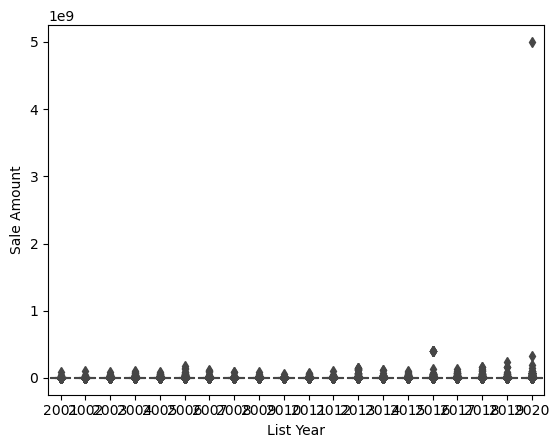

In [34]:
sns.boxplot(x='List Year', y='Sale Amount', data=real_estate)
print(real_estate[real_estate['Sale Amount'] == real_estate['Sale Amount'].max()])

In the `OPM remarks`, it is stated that an *INCORRECT SALE PRICE* is inserted. So this row will be deleted and will investigate if other rows have the same comment.

In [35]:

search_string = "INCORRECT SALE PRICE"

# Filter rows that contain the search string, including missing values
matching_rows = real_estate[real_estate['OPM remarks'].str.contains(search_string, na=False)]

matching_rows


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Full Address
59835,20200091,2020,08/19/2021,Willington,456 TOLLAND TPKE,2238530.0,5.000000e+09,0.000448,Apartments,NaN,25 - Other,APARTMENTS-COMMERICAL,INCORRECT SALE PRICE,NaN,"456, Tolland Tpke, Willington, Connecticut, Un..."
60894,20200078,2020,07/06/2021,Willington,224 RIVER ROAD,223070.0,3.187900e+08,0.000700,Residential,Single Family,25 - Other,COLONIAL,INCORRECT SALE PRICE - NO MLS,POINT (-72.30341 41.86603),"224, River Road, Willington, Connecticut, Unit..."
65620,20200102,2020,09/28/2021,Willington,7 TOLLAND TURNPIKE ROAD,112040.0,1.941491e+08,0.000577,Residential,Three Family,25 - Other,MULTI FAMILY,INCORRECT SALE PRICE,NaN,"7, Tolland Turnpike Road, Willington, Connecti..."
983742,19153,2019,01/14/2020,Newtown,19 OAKVIEW ROAD,153140.0,2.850000e+05,0.537333,Single Family,Single Family,25 - Other,NaN,INCORRECT SALE PRICE - SEE CORRECTING DEED #19172,NaN,"19, Oakview Road, Newtown, Connecticut, United..."


In [36]:
# Filter rows for incorrect_real_estate where 'OPM remarks' do not contain the search string
correct_real_estate = real_estate[~real_estate['OPM remarks'].str.contains(search_string, na=False)]
correct_real_estate


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Full Address
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,NaN,NaN,NaN,NaN,NaN,"230, Wakelee Ave, Ansonia, Connecticut, United..."
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family,NaN,NaN,NaN,NaN,"390, Turnpike Rd, Ashford, Connecticut, United..."
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo,NaN,NaN,NaN,NaN,"5, Chestnut Drive, Avon, Connecticut, United S..."
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.695800,Residential,Single Family,NaN,NaN,NaN,NaN,"111, Northington Drive, Avon, Connecticut, Uni..."
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.595700,Residential,Single Family,NaN,NaN,NaN,NaN,"70, Far Hills Drive, Avon, Connecticut, United..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997208,190272,2019,06/24/2020,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family,14 - Foreclosure,NaN,NaN,NaN,"4, Bishop Ct, New London, Connecticut, United ..."
997209,190284,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family,25 - Other,PRIVATE SALE,NaN,NaN,"126, Perkins Ave, Waterbury, Connecticut, Unit..."
997210,190129,2019,04/27/2020,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family,NaN,NaN,NaN,NaN,"19, Hathaway St, Windsor Locks, Connecticut, U..."
997211,190504,2019,06/03/2020,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family,NaN,NaN,NaN,NaN,"8, Bystrek Dr, Middletown, Connecticut, United..."


In [37]:
data_with_coordinates = correct_real_estate[correct_real_estate['Location'].notnull()]


In [38]:
data_with_coordinates

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Full Address
10,200086,2020,08/10/2021,Bethlehem,39 WOODLAND RD,168900.0,352000.0,0.479800,Residential,Single Family,NaN,NaN,NaN,POINT (-73.18197 41.64672),"39, Woodland Rd, Bethlehem, Connecticut, Unite..."
53,200194,2020,02/05/2021,East Lyme,5 ROCCO DR,170660.0,220000.0,0.775700,Vacant Land,NaN,NaN,NaN,NaN,POINT (-72.22025 41.3942),"5, Rocco Dr, East Lyme, Connecticut, United St..."
55,200320,2020,05/10/2021,East Lyme,9 FREEDOM WAY,776230.0,1525000.0,0.509000,Commercial,NaN,NaN,NaN,NaN,POINT (-72.24486 41.32183),"9, Freedom Way, East Lyme, Connecticut, United..."
98,200639,2020,07/28/2021,Groton,4 TYLER AVE,259770.0,650000.0,0.399646,Residential,Single Family,NaN,NaN,NaN,POINT (-72.07229 41.32148),"4, Tyler Ave, Groton, Connecticut, United States"
100,200020,2020,10/06/2020,Groton,98 EAST SHORE AVE,654570.0,990000.0,0.661182,Residential,Single Family,07 - Change in Property,TEAR DOWN,NaN,POINT (-72.00446 41.31252),"98, East Shore Ave, Groton, Connecticut, Unite..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997181,190389,2019,03/24/2020,Norwich,17 VINE ST,86600.0,182000.0,0.475800,Three Family,Three Family,NaN,NaN,NaN,POINT (-72.07006 41.53315),"17, Vine St, Norwich, Connecticut, United States"
997187,190478,2019,02/14/2020,Norwalk,38 HYATT AVE,283180.0,440000.0,0.643600,Single Family,Single Family,14 - Foreclosure,FORECLOSURE BY SALE: 1-7-9-0,NaN,POINT (-73.427 41.11112),"38, Hyatt Ave, Norwalk, Connecticut, United St..."
997192,190159,2019,07/23/2020,Weston,62 RIDGE ROAD,516990.0,790000.0,0.654400,Single Family,Single Family,NaN,NaN,NaN,POINT (-73.38341 41.19079),"62, Ridge Road, Weston, Connecticut, United St..."
997204,190105,2019,02/25/2020,Plymouth,18 OVERLOOK RD,104130.0,80000.0,1.301625,Single Family,Single Family,14 - Foreclosure,NaN,BANK SALE PER MLS,POINT (-72.98492 41.64753),"18, Overlook Rd, Plymouth, Connecticut, United..."


In [39]:
data_with_coordinates['coordinates'] = data_with_coordinates['Location'].apply(extract_coordinates)
data_with_coordinates['latitude'] = data_with_coordinates['coordinates'].apply(extract_latitude)
data_with_coordinates['longitude'] = data_with_coordinates['coordinates'].apply(extract_longitude)
data_with_coordinates = data_with_coordinates.drop(['coordinates', 'Location'], axis=1)

/var/folders/kv/4xjj0g696_lcyc7ms5pdd2t00000gn/T/ipykernel_42094/1436802188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_coordinates['coordinates'] = data_with_coordinates['Location'].apply(extract_coordinates)
/var/folders/kv/4xjj0g696_lcyc7ms5pdd2t00000gn/T/ipykernel_42094/1436802188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_coordinates['latitude'] = data_with_coordinates['coordinates'].apply(extract_latitude)
/var/folders/kv/4xjj0g696_lcyc7ms5pdd2t00000gn/T/ipykernel_

From this output, it is evident that `latitude` and `longitude` columns have the successfully extracted coordinates.

Next, check the datatypes of `latitude` and `longitude`

In [40]:
print(data_with_coordinates["latitude"].isna().sum())
print(data_with_coordinates["longitude"].isna().sum())

1
1


In [41]:
print(data_with_coordinates[data_with_coordinates["longitude"].isna() == True])
print(data_with_coordinates[data_with_coordinates["latitude"].isna() == True])

        Serial Number  List Year Date Recorded        Town        Address  \
932239          19055       2019    04/22/2020  Canterbury  171 LISBON RD   

        Assessed Value  Sale Amount  Sales Ratio  Property Type  \
932239        230800.0     450000.0       0.5129  Single Family   

       Residential Type Non Use Code Assessor Remarks OPM remarks  \
932239    Single Family          NaN              NaN         NaN   

                                             Full Address latitude longitude  
932239  171, Lisbon Rd, Canterbury, Connecticut, Unite...     None      None  
        Serial Number  List Year Date Recorded        Town        Address  \
932239          19055       2019    04/22/2020  Canterbury  171 LISBON RD   

        Assessed Value  Sale Amount  Sales Ratio  Property Type  \
932239        230800.0     450000.0       0.5129  Single Family   

       Residential Type Non Use Code Assessor Remarks OPM remarks  \
932239    Single Family          NaN              NaN 

The missing values in latitutde and longtitude come from the same row with the index number of 19055.

In [42]:
real_estate[real_estate["Serial Number"] == 19055]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Full Address
71865,19055,2001,06/21/2002,Hartford,2 MANNZ ST,36610.0,135000.0,0.271185,NaN,NaN,NaN,NaN,NaN,NaN,"2, Mannz St, Hartford, Connecticut, United States"
105567,19055,2001,08/01/2002,Stamford,26 STONE FENCE LN,568540.0,1250000.0,0.454832,NaN,NaN,NaN,NaN,NaN,NaN,"26, Stone Fence Ln, Stamford, Connecticut, Uni..."
116512,19055,2001,05/31/2002,South Windsor,61 CINNAMON SPGS,32200.0,83900.0,0.383790,NaN,NaN,NaN,NaN,NaN,NaN,"61, Cinnamon Spgs, South Windsor, Connecticut,..."
930014,19055,2019,03/03/2020,Lebanon,281 LAKESIDE DR,130550.0,225000.0,0.580200,Single Family,Single Family,NaN,NaN,NaN,NaN,"281, Lakeside Dr, Lebanon, Connecticut, United..."
931756,19055,2019,06/29/2020,Deep River,20 BOKUM RD,276260.0,399000.0,0.692400,Single Family,Single Family,NaN,NaN,NaN,NaN,"20, Bokum Rd, Deep River, Connecticut, United ..."
932044,19055,2019,01/02/2020,Burlington,21 CORNWALL ROAD,185640.0,188000.0,0.987400,Single Family,Single Family,25 - Other,HOUSE IN POOR CONDITION,NaN,NaN,"21, Cornwall Road, Burlington, Connecticut, Un..."
932239,19055,2019,04/22/2020,Canterbury,171 LISBON RD,230800.0,450000.0,0.512900,Single Family,Single Family,NaN,NaN,NaN,POINT (-72 41.67984),"171, Lisbon Rd, Canterbury, Connecticut, Unite..."
935920,19055,2019,10/28/2019,East Hartford,18-24 CHESTER ST,164710.0,256200.0,0.642900,Four Family,Four Family,NaN,NaN,NaN,NaN,"18, Chester St, East Hartford, Connecticut, Un..."
937614,19055,2019,06/25/2020,Lisbon,25 BARBER FARM RD,258400.0,405000.0,0.638000,Single Family,Single Family,NaN,NaN,NaN,NaN,"25, Barber Farm Rd, Lisbon, Connecticut, Unite..."
938120,19055,2019,03/19/2020,Marlborough,55 HODGE RD,178010.0,289900.0,0.614000,Single Family,Single Family,02 - Love and Affection,NaN,NaN,NaN,"55, Hodge Rd, Marlborough, Connecticut, United..."


In [43]:
real_estate[real_estate.index == 932239]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Full Address
932239,19055,2019,04/22/2020,Canterbury,171 LISBON RD,230800.0,450000.0,0.5129,Single Family,Single Family,NaN,NaN,NaN,POINT (-72 41.67984),"171, Lisbon Rd, Canterbury, Connecticut, Unite..."


In [44]:
real_estate[real_estate['Address']== "171 LISBON RD"]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Full Address
932239,19055,2019,04/22/2020,Canterbury,171 LISBON RD,230800.0,450000.0,0.5129,Single Family,Single Family,NaN,NaN,NaN,POINT (-72 41.67984),"171, Lisbon Rd, Canterbury, Connecticut, Unite..."


Since this address only appear once in the dataset and cannot be imputed for the coordinates, it is dropped: 

In [45]:
data_with_coordinates = data_with_coordinates.drop(932239)


In [46]:
# Check for duplicate rows
duplicates = data_with_coordinates[data_with_coordinates.duplicated()]
duplicates


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Full Address,latitude,longitude


In [47]:
data_with_coordinates = data_with_coordinates[data_with_coordinates["Residential Type"].notnull()]
data_with_coordinates

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Full Address,latitude,longitude
10,200086,2020,08/10/2021,Bethlehem,39 WOODLAND RD,168900.0,352000.0,0.479800,Residential,Single Family,NaN,NaN,NaN,"39, Woodland Rd, Bethlehem, Connecticut, Unite...",-73.18197,41.64672
98,200639,2020,07/28/2021,Groton,4 TYLER AVE,259770.0,650000.0,0.399646,Residential,Single Family,NaN,NaN,NaN,"4, Tyler Ave, Groton, Connecticut, United States",-72.07229,41.32148
100,200020,2020,10/06/2020,Groton,98 EAST SHORE AVE,654570.0,990000.0,0.661182,Residential,Single Family,07 - Change in Property,TEAR DOWN,NaN,"98, East Shore Ave, Groton, Connecticut, Unite...",-72.00446,41.31252
137,200038,2020,10/09/2020,Meriden,41 SUNNY LANE,209440.0,307000.0,0.682200,Residential,Single Family,NaN,NaN,NaN,"41, Sunny Lane, Meriden, Connecticut, United S...",-72.79013,41.51639
299,200374,2020,05/18/2021,Vernon,27 TRACY DRIVE,129190.0,226800.0,0.569600,Residential,Single Family,NaN,NaN,NaN,"27, Tracy Drive, Vernon, Connecticut, United S...",-72.47857,41.84938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997181,190389,2019,03/24/2020,Norwich,17 VINE ST,86600.0,182000.0,0.475800,Three Family,Three Family,NaN,NaN,NaN,"17, Vine St, Norwich, Connecticut, United States",-72.07006,41.53315
997187,190478,2019,02/14/2020,Norwalk,38 HYATT AVE,283180.0,440000.0,0.643600,Single Family,Single Family,14 - Foreclosure,FORECLOSURE BY SALE: 1-7-9-0,NaN,"38, Hyatt Ave, Norwalk, Connecticut, United St...",-73.427,41.11112
997192,190159,2019,07/23/2020,Weston,62 RIDGE ROAD,516990.0,790000.0,0.654400,Single Family,Single Family,NaN,NaN,NaN,"62, Ridge Road, Weston, Connecticut, United St...",-73.38341,41.19079
997204,190105,2019,02/25/2020,Plymouth,18 OVERLOOK RD,104130.0,80000.0,1.301625,Single Family,Single Family,14 - Foreclosure,NaN,BANK SALE PER MLS,"18, Overlook Rd, Plymouth, Connecticut, United...",-72.98492,41.64753


In [48]:
data_with_coordinates['Non Use Code'] = data_with_coordinates['Non Use Code'].str.replace(r'[a-zA-Z-]', '')

data_with_coordinates['Non Use Code']  = data_with_coordinates['Non Use Code'].str.replace(r'0([1-9])\b', r'\1')

data_with_coordinates['Non Use Code']  = data_with_coordinates['Non Use Code'].str.replace(r'\s', '')

data_with_coordinates['Non Use Code'].unique()

/var/folders/kv/4xjj0g696_lcyc7ms5pdd2t00000gn/T/ipykernel_42094/1887205951.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_with_coordinates['Non Use Code'] = data_with_coordinates['Non Use Code'].str.replace(r'[a-zA-Z-]', '')
/var/folders/kv/4xjj0g696_lcyc7ms5pdd2t00000gn/T/ipykernel_42094/1887205951.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data_with_coordinates['Non Use Code']  = data_with_coordinates['Non Use Code'].str.replace(r'0([1-9])\b', r'\1')
/var/folders/kv/4xjj0g696_lcyc7ms5pdd2t00000gn/T/ipykernel_42094/1887205951.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data_with_coordinates['Non Use Code']  = data_with_coordinates['Non Use Code'].str.replace(r'\s', '')


array([nan, '7', '25', '1', '6', '17', '10', '28', '14', '24', '8', '9',
       '16', '26', '18', '4', '11', '27', '5', '22', '15', '12', '19',
       '3', '13', '21', '30', '23', '29', '2', '20'], dtype=object)

In [49]:


# Convert the 'date_column' to a  data type if not already
data_with_coordinates['Date Recorded'] = pd.to_datetime(data_with_coordinates['Date Recorded'])

# Extract the month and create a new column 'extracted_month'
data_with_coordinates['month_recorded'] = data_with_coordinates['Date Recorded'].dt.month
data_with_coordinates['year_recorded'] = data_with_coordinates['Date Recorded'].dt.year




In [50]:
data_with_coordinates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123753 entries, 10 to 997206
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Serial Number     123753 non-null  int64         
 1   List Year         123753 non-null  int64         
 2   Date Recorded     123753 non-null  datetime64[ns]
 3   Town              123753 non-null  object        
 4   Address           123753 non-null  object        
 5   Assessed Value    123753 non-null  float64       
 6   Sale Amount       123753 non-null  float64       
 7   Sales Ratio       123753 non-null  float64       
 8   Property Type     123753 non-null  object        
 9   Residential Type  123753 non-null  object        
 10  Non Use Code      35632 non-null   object        
 11  Assessor Remarks  25466 non-null   object        
 12  OPM remarks       1980 non-null    object        
 13  Full Address      123535 non-null  object        
 14  lat

In [51]:
data_with_coordinates.to_csv('../Datasets/cleaned_real_estate.csv')